# ----------------- REAL LE-NET 5 ARCHITECTURE ------------------------------

In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)


import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten ,Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from sklearn.model_selection import train_test_split
import timeit
from keras import optimizers
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Using TensorFlow backend.
UsageError: unrecognized arguments: This Python 3 environment comes with many helpful analytics libraries installed


# --load data--

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

train_data = pd.read_csv("../input/ece657a-w20-asg3-part2/train.csv")
test_data = pd.read_csv("../input/ece657a-w20-asg3-part2/testX.csv")

x = train_data.iloc[:,2:].values
y = train_data.iloc[:,1].values

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [3]:
test_data

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [4]:
x.shape

(60000, 784)

In [5]:
y

array([4, 0, 0, ..., 4, 0, 2])

# --Splitting into train and val set--

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train.shape

(48000, 784)

In [8]:
x_test.shape

(12000, 784)

In [9]:
y_train.shape

(48000,)

In [10]:
y_test.shape


(12000,)

In [11]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [12]:
img_size=28
num_classes=5

# 1. --Reshaping into 28*28--
# 2. --Normalize--

In [13]:
x_train = x_train.reshape(x_train.shape[0],img_size,img_size,1)
x_test = x_test.reshape(x_test.shape[0],img_size,img_size,1)
input_size = (28, 28,1)

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (48000, 28, 28, 1)
x_test shape: (12000, 28, 28, 1)
48000 train samples
12000 test samples
y_train shape: (48000,)


In [14]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# --Categorical labels--

In [15]:
#Converting labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [16]:
y_train.shape

(48000, 5)

In [17]:
y_test.shape

(12000, 5)

# -------------------------------------------------------------------------------------

# MODEL 1 --> adam = Adam(lr=0.01) | epoch = 80 | batch_size= 64 

In [18]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.losses import categorical_crossentropy

In [20]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(28, 28, 1), strides=(1,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(5, activation='softmax'))

In [21]:
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               232440    
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [23]:
adam = Adam() 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# Time Taken 332.455398782







In [24]:
import timeit
start = timeit.default_timer()
a=model.fit(x_train, y_train, batch_size=64,epochs=80,verbose=1, validation_data=(x_test, y_test),shuffle=False)
stop = timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/80
48000/48000 [==============================] - 8s 175us/step - loss: 0.6152 - accuracy: 0.7485 - val_loss: 0.4272 - val_accuracy: 0.8335
Epoch 2/80
48000/48000 [==============================] - 4s 84us/step - loss: 0.4157 - accuracy: 0.8358 - val_loss: 0.4128 - val_accuracy: 0.8337
Epoch 3/80
48000/48000 [==============================] - 4s 82us/step - loss: 0.3628 - accuracy: 0.8577 - val_loss: 0.4084 - val_accuracy: 0.8340
Epoch 4/80
48000/48000 [==============================] - 4s 83us/step - loss: 0.3314 - accuracy: 0.8710 - val_loss: 0.3600 - val_accuracy: 0.8574
Epoch 5/80
48000/48000 [==============================] - 4s 85us/step - loss: 0.3069 - accuracy: 0.8812 - val_loss: 0.3339 - val_accuracy: 0.8662
Epoch 6/80
48000/48000 [==============================] - 4s 83us/step - loss: 0.2914 - accuracy: 0.8856 - val_loss: 0.3277 - val_accuracy: 0.8701
Epoch 7/80
48000/48000 [==============================] - 4s 82us/s

48000/48000 [==============================] - 4s 85us/step - loss: 0.0839 - accuracy: 0.9679 - val_loss: 0.5699 - val_accuracy: 0.8579
Epoch 57/80
48000/48000 [==============================] - 4s 92us/step - loss: 0.0850 - accuracy: 0.9671 - val_loss: 0.6212 - val_accuracy: 0.8511
Epoch 58/80
48000/48000 [==============================] - 4s 93us/step - loss: 0.0779 - accuracy: 0.9713 - val_loss: 0.5959 - val_accuracy: 0.8536
Epoch 59/80
48000/48000 [==============================] - 4s 89us/step - loss: 0.0823 - accuracy: 0.9684 - val_loss: 0.6467 - val_accuracy: 0.8471
Epoch 60/80
48000/48000 [==============================] - 4s 81us/step - loss: 0.0797 - accuracy: 0.9702 - val_loss: 0.5737 - val_accuracy: 0.8573
Epoch 61/80
48000/48000 [==============================] - 4s 88us/step - loss: 0.0809 - accuracy: 0.9690 - val_loss: 0.6564 - val_accuracy: 0.8447
Epoch 62/80
48000/48000 [==============================] - 4s 82us/step - loss: 0.0825 - accuracy: 0.9684 - val_loss: 0.5820

In [25]:
print('Time Taken',stop-start)

Time Taken 332.455398782


# RESULT | MODEL 1 | VAL DATA
## Epoch 80/80 | 48000/48000 | val_loss: 0.5924 - val_accuracy: 0.8618

# PLOTS

In [26]:
a.history

{'val_loss': [0.42724671228726707,
  0.4128080400625865,
  0.40835613624254863,
  0.36001927280426027,
  0.3339363918304443,
  0.32767469716072084,
  0.36493744468688966,
  0.3641292533079783,
  0.3539350506067276,
  0.3633141930103302,
  0.3439695063432058,
  0.37908994805812835,
  0.366344425757726,
  0.4174609452088674,
  0.3815810499588648,
  0.3855502429008484,
  0.3762721899350484,
  0.3768981680870056,
  0.38384706807136537,
  0.40338177037239076,
  0.40988185397783916,
  0.4417104381720225,
  0.4592779860496521,
  0.41504120914141335,
  0.4316089152495066,
  0.4339120397567749,
  0.4277834927638372,
  0.4572777057091395,
  0.4858834866285324,
  0.4922945191860199,
  0.5067639206250508,
  0.4765948556264242,
  0.4698074341615041,
  0.4882488505045573,
  0.4937882317304611,
  0.49595412532488503,
  0.501192986369133,
  0.4957923451264699,
  0.5335647086699804,
  0.5493582507769267,
  0.5375825384855271,
  0.5276379842758179,
  0.6295930434068044,
  0.5634171462059021,
  0.6024710

In [27]:
print(a.history['accuracy'])
print(a.history['loss'])
print(a.history['val_accuracy'])
print(a.history['val_loss'])

[0.74852085, 0.8358125, 0.8576875, 0.8709792, 0.8811875, 0.8855625, 0.8890625, 0.89641666, 0.9023333, 0.9091875, 0.9149167, 0.9197083, 0.9182708, 0.9144792, 0.9151667, 0.92354167, 0.9297708, 0.93441665, 0.9370833, 0.93691665, 0.93960416, 0.94179165, 0.94416666, 0.9415417, 0.94458336, 0.94533336, 0.95295835, 0.95027083, 0.9487917, 0.95045835, 0.9527083, 0.9506875, 0.95516664, 0.9587917, 0.9595, 0.9594167, 0.9599375, 0.9608542, 0.960875, 0.9603125, 0.95979166, 0.95760417, 0.9596458, 0.96166664, 0.965875, 0.96422917, 0.960625, 0.9618958, 0.96133333, 0.965375, 0.96504164, 0.968125, 0.9661458, 0.96770835, 0.9647292, 0.9679375, 0.96714586, 0.97129166, 0.9684375, 0.9701875, 0.9689792, 0.9683958, 0.9705, 0.97025, 0.97108334, 0.96935415, 0.97225, 0.971, 0.9739792, 0.9729375, 0.9731042, 0.9709375, 0.9698125, 0.9741875, 0.97425, 0.97375, 0.97491664, 0.97420835, 0.9725625, 0.97154164]
[0.6151895728905996, 0.4156698092619578, 0.3627950982451439, 0.3314405765136083, 0.30687812876701354, 0.2914443283

### Making dataframe

In [28]:
train_acc_1=a.history['accuracy']
train_loss_1=a.history['loss']
val_acc_1=a.history['val_accuracy']
val_loss_1=a.history['val_loss']

num=len(a.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [29]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80]

In [30]:
history_df1=pd.DataFrame(eplist,columns = ['Epoch'])
history_df1['train_acc']=pd.DataFrame(train_acc_1)

In [31]:
history_df1['train_loss']=pd.DataFrame(train_loss_1)
history_df1['val_acc']=pd.DataFrame(val_acc_1)
history_df1['val_loss']=pd.DataFrame(val_loss_1)

In [32]:
history_df1

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.748521,0.615190,0.833500,0.427247
1,2,0.835813,0.415670,0.833667,0.412808
2,3,0.857687,0.362795,0.834000,0.408356
3,4,0.870979,0.331441,0.857417,0.360019
4,5,0.881187,0.306878,0.866167,0.333936
...,...,...,...,...,...
75,76,0.973750,0.067991,0.863500,0.601892
76,77,0.974917,0.067943,0.860500,0.615146
77,78,0.974208,0.067406,0.855333,0.623391
78,79,0.972562,0.072472,0.861500,0.582907


### Epoch vs Train loss

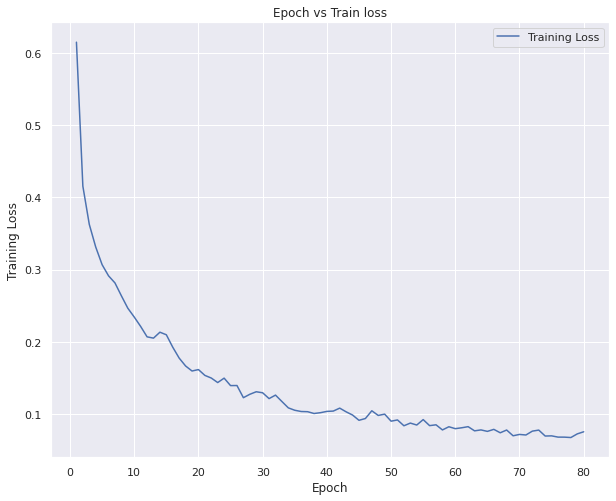

In [33]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df1)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

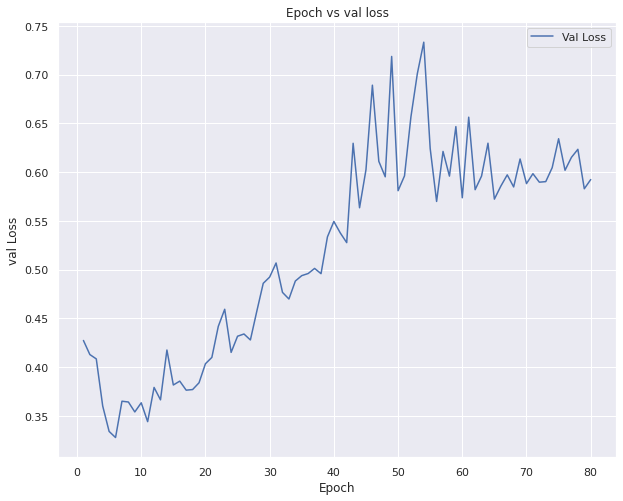

In [34]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df1)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

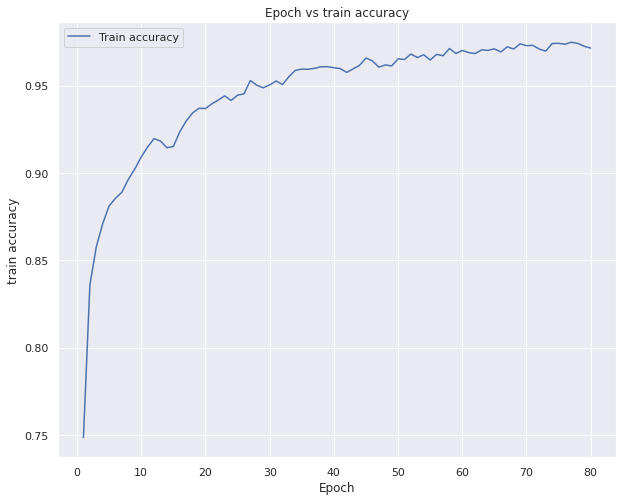

In [35]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df1)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

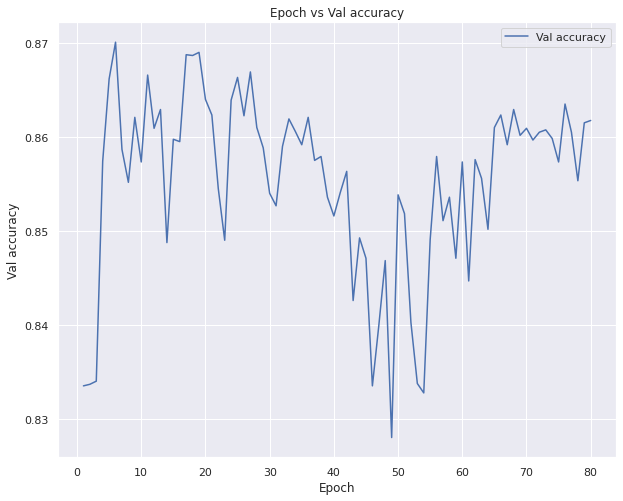

In [36]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df1)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

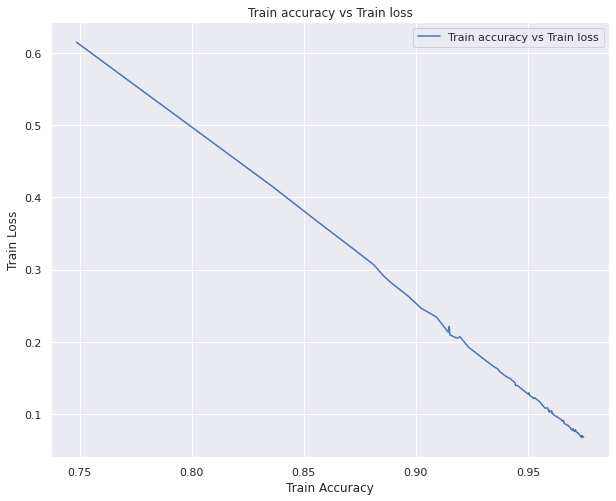

In [37]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df1)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

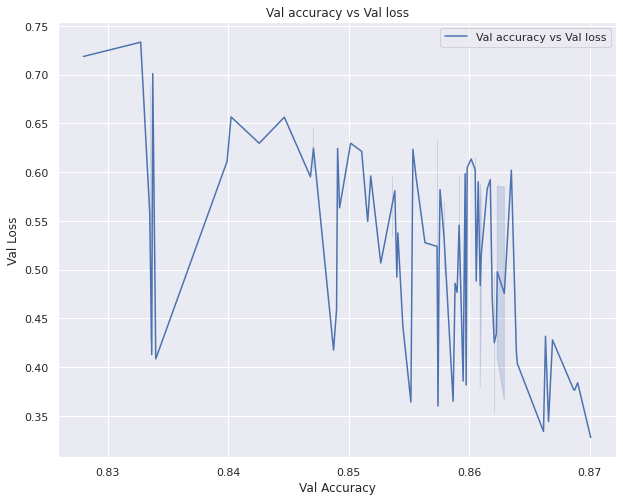

In [38]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df1)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Final data prediction

In [39]:
test_data


,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# --Reshaping into 28*28--

In [40]:
# for test data
#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)

In [41]:
df_x_test.shape

(10000, 28, 28, 1)

In [42]:
df_x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# --Normalizing--

In [43]:
df_x_test=df_x_test.astype('float32')
#rescaling it between 0 to 1
df_x_test /=255


In [44]:
target_classes1 = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 0s 46us/step


In [45]:
target_classes1

array([[1.01642083e-13, 2.93645662e-05, 3.27061466e-03, 9.77617443e-01,
        1.90825872e-02],
       [7.74208273e-15, 1.83857899e-12, 1.30442388e-07, 6.65393833e-04,
        9.99334395e-01],
       [1.95338532e-01, 8.04656923e-01, 4.48665014e-06, 3.02126033e-11,
        5.79333402e-14],
       ...,
       [2.58735811e-10, 3.21445077e-06, 2.00791787e-02, 9.37509298e-01,
        4.24082838e-02],
       [2.21189900e-10, 1.44147957e-02, 9.85585153e-01, 3.27295702e-09,
        1.18647566e-11],
       [1.99551986e-10, 1.45631640e-09, 9.84206676e-01, 1.57932732e-02,
        2.77589085e-09]], dtype=float32)

In [46]:
target_classes1=np.argmax(target_classes1,axis=1)

In [47]:
target_classes1

array([3, 4, 1, ..., 3, 2, 2])

In [48]:
target_classes2 = model.predict_classes(df_x_test,verbose=1)
target_classes2

10000/10000 [==============================] - 0s 43us/step


array([3, 4, 1, ..., 3, 2, 2])

In [49]:
target_classes2=pd.DataFrame(target_classes2)

In [50]:
target_classes2=pd.DataFrame.reset_index(target_classes2)
target_classes2.columns=['Id','Label']

In [51]:
target_classes2

,Id,Label
0,0,3
1,1,4
2,2,1
3,3,1
4,4,2
...,...,...
9995,9995,3
9996,9996,1
9997,9997,3
9998,9998,2


In [52]:
filename = 'submission_lenet5.csv'
target_classes2.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_lenet5.csv
